#### Import & Drive

In [71]:
# RECUPERER LES FICHIERS CSV DANS MON DRIVE
import os
from google.colab import drive,files
drive.mount('/content/gdrive')
!ls /content

DRIVE_LEDOSSIER = "/content/gdrive/MyDrive/Zone de Code Python/• Mes logiciels Hack/• Battery Stat/backups"
print(os.listdir(DRIVE_LEDOSSIER)[-3:])

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
gdrive	sample_data
['export_battery [2021-04-13-0931] (1).csv', 'export_battery [2021-04-13-1020] (1).csv', 'export_battery [2021-04-13-1023] (1).csv']


#### Fonctions

In [72]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
import pandas as pd

#retourner tous les fichiers csv
def LesFichiers():
    res = [DRIVE_LEDOSSIER + "/" + fic for fic in os.listdir(DRIVE_LEDOSSIER)] 
    return sorted(res)

# Fusionner en un seul data frame toutes ces données
def FusionFichiersCSV(listefichierCSV):
    listeObs = []
    for fic in listefichierCSV:
        obs = pd.read_csv(fic,sep =";",index_col='datetime',parse_dates=True)
        #print(obs)
        listeObs.append(obs)
    res = pd.concat(listeObs)
    return res

Data = FusionFichiersCSV(LesFichiers())

#### Le Graphique

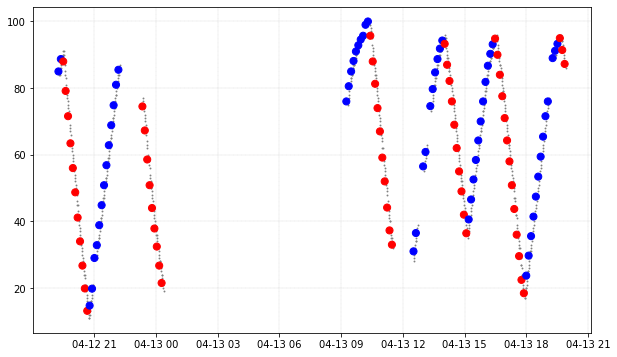

In [81]:
#@title Batterie de Mlamali { display-mode: "form" ,  run: "auto" }
figure_size = (10,6)   #@param {type : "raw" }
plt.figure(figsize=figure_size)
interval_min = "2021-04-12 16:00" #@param {type:"string"}
interval_max = "2021-04-13 20:00" #@param {type:"string"}

size_point = 1 #@param {type:"slider", min:1, max:10, step:0.1}

aff_moyparmin = True #@param {type:"boolean"}



moyParMin =  7 #@param {type:"slider", min:5, max:15, step:1}

if moyParMin < 3:
    moyParMin = 3



def AfficherGraphe(Data):
    global interval_min, interval_max


    plt.grid(linestyle = '--', linewidth = 0.25,zorder=0)
    """
    plt.ylabel('Battery % --->')
    plt.xlabel('DATE --->')
    start = pd.Timestamp(interval_min)
    end = pd.Timestamp(interval_max)
    x = pd.date_range(interval_min, interval_max, periods=100).to_pydatetime()
    y = np.array([50 for i in range(len(x))])
    plt.plot(x,y,'orange',linewidth=1,zorder=0)
    """

    


    Zone_Data = Data[interval_min:interval_max]
    
    plt.scatter(Zone_Data.index,Zone_Data["%"],c='grey', s=0.8 )

    Zone_SAMPLED = Zone_Data.resample(str(moyParMin) + 'min').mean()
    col = np.where(np.array( Zone_SAMPLED['plugged']) ==1,'b','r')
    plt.scatter(Zone_SAMPLED.index,Zone_SAMPLED["%"],c=col,s=size_point*50,zorder=5)

    plt.show()


AfficherGraphe(Data)